In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.neighbors import NearestNeighbors

In [2]:
# Load Data
customers = pd.read_csv('/content/Customers.csv')
products = pd.read_csv('/content/Products.csv')
transactions = pd.read_csv('/content/Transactions.csv')

In [3]:
customers.shape

(200, 4)

In [4]:
products.shape

(100, 4)

In [5]:
transactions.shape

(1000, 7)

In [6]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [7]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [8]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [9]:
customers.isnull().sum()

,0
CustomerID,0
CustomerName,0
Region,0
SignupDate,0


In [10]:
products.isnull().sum()

,0
ProductID,0
ProductName,0
Category,0
Price,0


In [11]:
transactions.isnull().sum()

,0
TransactionID,0
CustomerID,0
ProductID,0
TransactionDate,0
Quantity,0
TotalValue,0
Price,0


Silhouette Score: 0.31


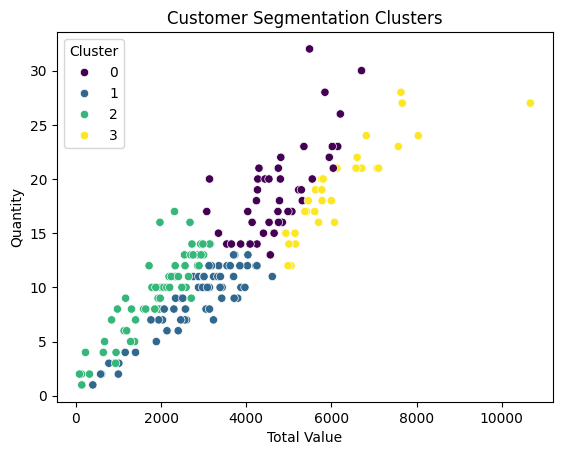

          TotalValue   Quantity       Price
Cluster                                    
0        4764.756279  18.976744  248.966810
1        2777.735970   8.805970  323.027698
2        1893.292203   9.389831  201.215296
3        6243.283000  19.233333  328.629939


In [23]:
# Task 3: Customer Segmentation / Clustering
# Feature engineering
# Ensure Price column exists
if 'Price' not in data.columns:
    data['Price'] = data['TotalValue'] / data['Quantity']
    data['Price'] = data['Price'].fillna(0)  # Handle division by zero or missing values

# Feature Engineering
features = data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'Price': 'mean'  # Use the newly created Price column
})

# Data Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Clustering (K-Means)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

kmeans = KMeans(n_clusters=4, random_state=42)  # Adjust 'n_clusters' as needed
cluster_labels = kmeans.fit_predict(scaled_features)

# Add cluster labels to the features DataFrame
features['Cluster'] = cluster_labels

# Evaluate Clustering
silhouette_avg = silhouette_score(scaled_features, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Visualize Clusters
sns.scatterplot(
    x=features['TotalValue'],
    y=features['Quantity'],
    hue=features['Cluster'],
    palette='viridis'
)
plt.title('Customer Segmentation Clusters')
plt.xlabel('Total Value')
plt.ylabel('Quantity')
plt.show()

# Cluster Analysis
print(features.groupby('Cluster').mean())

In [24]:
# Add Cluster Labels to the Features DataFrame
features['Cluster'] = cluster_labels  # Use the variable cluster_labels from the clustering step

# Save the Results to a CSV File
features.to_csv('Pavankumar_Gogula_Clustering.pdf', index=True)

In [25]:
# Evaluate clustering quality using Silhouette Score
silhouette_avg = silhouette_score(scaled_features, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Cluster Centers: Understanding the centroid (average) of each cluster
print("Cluster Centers (Centroids):")
print(kmeans.cluster_centers_)

# Check distribution of customers across clusters
print("Cluster Distribution:")
print(features['Cluster'].value_counts())

Silhouette Score: 0.31
Cluster Centers (Centroids):
[[ 0.70973416  1.01506208 -0.32784693]
 [-0.37721716 -0.64260752  0.73769579]
 [-0.86103069 -0.54744784 -1.01486648]
 [ 1.51852638  1.05688191  0.8182974 ]]
Cluster Distribution:
Cluster
1    67
2    59
0    43
3    30
Name: count, dtype: int64
